In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/covid_toy.csv")

In [ ]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [ ]:
df.shape

(100, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   gender     100 non-null    object 
 2   fever      90 non-null     float64
 3   cough      100 non-null    object 
 4   city       100 non-null    object 
 5   has_covid  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [ ]:
df.describe()

,age,fever
count,100.000000,90.000000
mean,44.220000,100.844444
std,24.878931,2.054926
min,5.000000,98.000000
25%,20.000000,99.000000
50%,45.000000,101.000000
75%,66.500000,102.750000
max,84.000000,104.000000


<Axes: ylabel='age'>

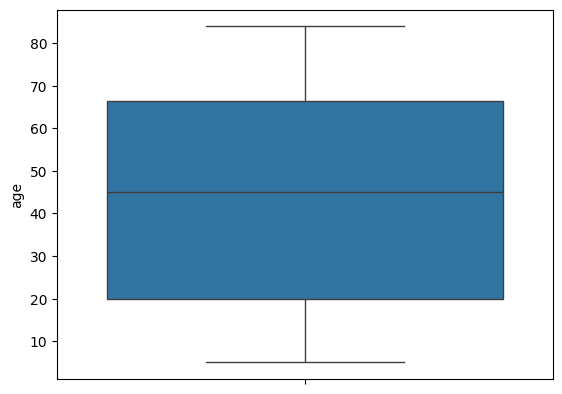

In [ ]:
sns.boxplot(df["age"])

<Axes: ylabel='fever'>

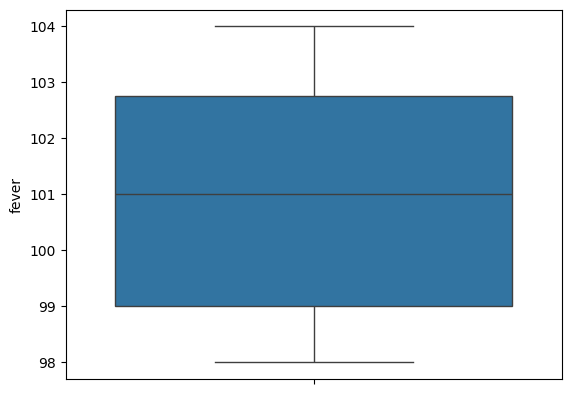

In [ ]:
sns.boxplot(df["fever"])

In [ ]:
df.value_counts('city')

city
Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: count, dtype: int64

In [ ]:
df.value_counts('cough')

cough
Mild      62
Strong    38
Name: count, dtype: int64

In [ ]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
oe=OneHotEncoder()

In [ ]:
df[["has_covid"]]=oe.fit_transform(df[["has_covid"]])

In [ ]:
type(df[["has_covid"]])

pandas.core.frame.DataFrame

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,5:]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

,age,gender,fever,cough,city
43,22,Female,99.0,Mild,Bangalore
62,56,Female,104.0,Strong,Bangalore
3,31,Female,98.0,Mild,Kolkata
71,75,Female,104.0,Strong,Delhi
45,72,Male,99.0,Mild,Bangalore
...,...,...,...,...,...
96,51,Female,101.0,Strong,Kolkata
67,65,Male,99.0,Mild,Bangalore
64,42,Male,104.0,Mild,Mumbai
47,18,Female,104.0,Mild,Bangalore


In [ ]:
y_train

,has_covid
43,Yes
62,Yes
3,No
71,No
45,No
...,...
96,Yes
67,No
64,No
47,No


In [ ]:
y_test

,has_covid
26,Yes
86,Yes
2,No
55,Yes
75,Yes
93,Yes
16,Yes
73,Yes
54,Yes
95,No


In [ ]:
transformer=ColumnTransformer(transformers=[('tf1',SimpleImputer(),["fever"]),
 ('tf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
  ('tf3',OneHotEncoder(sparse=False),['city']),
   ('tf4',OneHotEncoder(sparse=False),['gender'])],
                              remainder="passthrough")

In [ ]:
X_train=transformer.fit_transform(X_train)
X_test=transformer.fit_transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [ ]:
X_train.shape

(80, 9)

In [ ]:
X_test.shape

(20, 9)

In [ ]:
y_train.shape

(80, 1)

In [ ]:
y_test.shape

(20, 1)

In [ ]:
X_test.shape

(20, 9)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [ ]:
lr=DecisionTreeClassifier()

In [ ]:
lr.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.35